<span class='main_title'>NPL with Word2Vec</span>
<hr>
<span class='author'>author:<a href='github.com/baiochi'>@baiochi<span>

# Notebook Configuration

## Dependencies

In [1]:
!pip install transformers
!pip install gensim

## Libraries and APIs

In [2]:
# Terminal ASCII colors
WHITE = '\033[39m'; CYAN  = '\033[36m'; ORANGE = '\033[93m';
# Image drawing colors
BLUE   = '#00fafd'    # rgb(0,250,253)
YELLOW = '#f5b324'    # rgb(245,179,36)
# Styling notebook with CSS
from IPython.core.display import HTML
styles = open("./styles/custom.css", "r").read()
HTML(styles)

In [3]:
import os
import session_info
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

session_info.show()

In /Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/baiochi/opt/anaconda3/lib/

# Loading Data

In [4]:
# Load Train Dataset
df = pd.read_csv('data/train_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int64 
 4   query_used  95000 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
df['tweet_text'] = df['tweet_text'].apply(str.split)

# Map labels
df['sentiment'] = df['sentiment'].astype('category')
labels = df['sentiment'].cat.categories

# Prepare data
X = df['tweet_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from data.gensimword2vec import GensimWord2VecVectorizer

gensim_word2vec_tr = GensimWord2VecVectorizer(vector_size=50, min_count=3, sg=1, alpha=0.025, epochs=10)

xgbc = xgb.XGBClassifier(learning_rate=0.01, n_estimators=100, n_jobs=-1)

w2v_xgb = Pipeline([
    ('w2v', gensim_word2vec_tr), 
    ('xgb', xgbc)
])
w2v_xgb

Pipeline(steps=[('w2v',
                 GensimWord2VecVectorizer(epochs=10, min_count=3, sg=1,
                                          vector_size=50)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, enable_categorical=False,
                               gamma=None, gpu_id=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=-1, num_parallel_tree=None,
                               predictor=None, random_state=None,
                               reg_alpha=None, reg_lambda=None,
                               sca

In [9]:
w2v_xgb.fit(X_train, y_train)

collecting all words and their counts
PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
PROGRESS: at sentence #10000, processed 150438 words, keeping 39675 word types
PROGRESS: at sentence #20000, processed 298795 words, keeping 66908 word types
PROGRESS: at sentence #30000, processed 447587 words, keeping 90750 word types
PROGRESS: at sentence #40000, processed 597464 words, keeping 112795 word types
PROGRESS: at sentence #50000, processed 746580 words, keeping 133197 word types
PROGRESS: at sentence #60000, processed 897421 words, keeping 152479 word types
PROGRESS: at sentence #70000, processed 1047006 words, keeping 171214 word types
collected 182129 word types from a corpus of 1137033 raw words and 76000 sentences
Creating a fresh vocabulary
Word2Vec lifecycle event {'msg': 'effective_min_count=3 retains 28275 unique words (15.52% of original 182129, drops 153854)', 'datetime': '2022-05-25T20:24:56.645704', 'gensim': '4.2.0', 'python': '3.9.7 (default, Sep 16 2021,

[20:36:21] WARNING: /private/var/folders/_m/3m0bcc4n6h73gny0bt6_g4x80000gn/T/pip-install-4m5tp6_t/xgboost_17c0d7c1e7cb4a3aab80bf74764ec6a2/build/temp.macosx-10.9-x86_64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('w2v',
                 GensimWord2VecVectorizer(epochs=10, min_count=3, sg=1,
                                          vector_size=50)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=-1, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_p

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = w2v_xgb.predict(X_train)
print('Training set accuracy %s' % accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

Training set accuracy 0.8994868421052632


array([[22298,  2728,   267],
       [ 2411, 22057,   891],
       [  197,  1145, 24006]])

In [11]:
y_test_pred = w2v_xgb.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

Test set accuracy 0.8861578947368421


array([[5520,  809,   74],
       [ 650, 5410,  259],
       [  55,  316, 5907]])

In [19]:
vocab_size = len(w2v_xgb.named_steps['w2v'].model_.wv.index_to_key)
print('vocabulary size:', vocab_size)
w2v_xgb.named_steps['w2v'].model_.wv.most_similar(positive=['batata'])

vocabulary size: 28275


[('frita', 0.9662717580795288),
 ('brigadeiro', 0.9132557511329651),
 ('academia,', 0.9101062417030334),
 ('conchinha', 0.9022582769393921),
 ('cvs', 0.9019947052001953),
 ('morango', 0.9016848206520081),
 ('strogonoff', 0.9012042880058289),
 ('cólica,', 0.8967577815055847),
 ('tres', 0.895926296710968),
 ('bola,', 0.8922023773193359)]

# XGBoost

In [47]:
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# Load Train Dataset
df = pd.read_csv('data/train_dataset.csv')
X = df['tweet_text']
y = df['sentiment']

In [54]:
clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('xgb', XGBClassifier( 
        learning_rate = 0.1,
        max_depth = 5, 
        alpha = 10,
        colsample_bytree = 0.3,
        n_estimators = 10,
        eval_metric='logloss',
        use_label_encoder=False, 
        n_jobs=-1,) ),
])

# X is the dataframe we created in previous snippet
clf.fit(X, y)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('xgb',
                 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.3, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=10,
                               n_jobs=-1, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=10, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                 

In [59]:
X = X.astype('category')
# X is a dataframe we created in previous snippet
Xy = xgb.DMatrix(X, y, enable_categorical=True)
booster = xgb.train({"tree_method": "hist", "max_cat_to_onehot": 5}, Xy)

[02:15:29] WARNING: /private/var/folders/_m/3m0bcc4n6h73gny0bt6_g4x80000gn/T/pip-install-4m5tp6_t/xgboost_17c0d7c1e7cb4a3aab80bf74764ec6a2/build/temp.macosx-10.9-x86_64-3.9/xgboost/src/learner.cc:576: 
Parameters: { "max_cat_to_onehot" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [60]:
SHAP = booster.predict(Xy, pred_interactions=True)

# categorical features are listed as "c"
print(booster.feature_types)

None


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

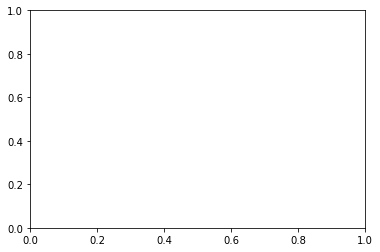

In [56]:
# Get a graph
graph = xgb.to_graphviz(clf.named_steps['xgb'], num_trees=1)
# Or get a matplotlib axis
ax = xgb.plot_tree(clf.named_steps['xgb'], num_trees=1)
# Get feature importances
clf.named_steps['xgb'].feature_importances_

In [22]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [21]:
xgb.plot_importance(w2v_xgb)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

ValueError: tree must be Booster, XGBModel or dict instance

# Keras

In [ ]:
# the keras model/graph would look something like this:
from keras import layers, optimizers, Model

# adjustable parameter that control the dimension of the word vectors
embed_size = 100

input_center = layers.Input((1,))
input_context = layers.Input((1,))

embedding = layers.Embedding(vocab_size, embed_size, input_length=1, name='embed_in')
center = embedding(input_center)  # shape [seq_len, # features (1), embed_size]
context = embedding(input_context)

center = layers.Reshape((embed_size,))(center)
context = layers.Reshape((embed_size,))(context)

dot_product = layers.dot([center, context], axes=1)
output = layers.Dense(1, activation='sigmoid')(dot_product)
model = Model(inputs=[input_center, input_context], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.01))
model.summary()